In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
a=pd.read_csv('Re.csv')
df=pd.DataFrame(a)
df=pd.DataFrame(a[['Date ','close ','OPEN ','HIGH ','LOW ']])
df.columns=['Date','close','open','high','low']
n=df.shape[0]
for i in range(n):
    df.close[i]=float(df.close[i].replace(",",""))
    df.open[i]=float(df.open[i].replace(",",""))
    df.high[i]=float(df.high[i].replace(",",""))
    df.low[i]=float(df.low[i].replace(",",""))
#df['Date']=pd.to_datetime(df.Date)    
df.head()

,Date,close,open,high,low
0,01-01-2020,1509.6,1518.0,1527.1,1505.5
1,02-01-2020,1535.3,1512.0,1540.95,1512.0
2,03-01-2020,1537.15,1533.0,1541.65,1523.0
3,06-01-2020,1501.5,1520.0,1527.9,1498.0
4,07-01-2020,1524.6,1519.0,1534.5,1513.5


In [3]:
df.shape

(500, 5)

<AxesSubplot:>

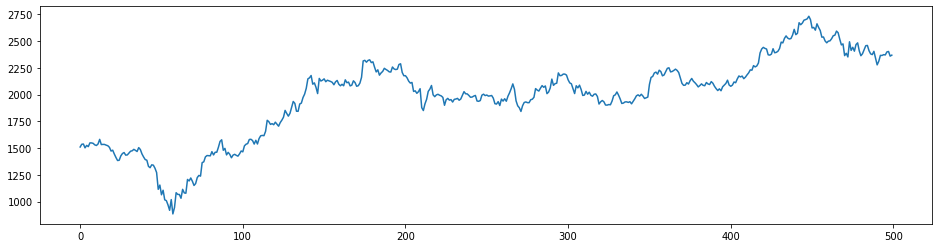

In [4]:
df['close'].plot(figsize=(16,4))

In [5]:
x=df[['open','high','low']]
y=df['close']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(400, 3)
(100, 3)


In [7]:
# Let’s create an instance of the class LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.coef_)
print(regressor.intercept_)
predicted=regressor.predict(x_test)

[-0.64559128  0.84777457  0.79859362]
-3.5175927916448018


In [8]:
df2=pd.DataFrame({'Actual Price':y_test,'Predicted Price': predicted});df2

,Actual Price,Predicted Price
393,2053.25,2060.907688
67,1192.15,1202.968242
328,1988.65,1985.084779
100,1464.4,1456.755597
461,2501.95,2468.037020
...,...,...
422,2425.6,2425.280618
57,884.05,909.666021
25,1426.4,1423.365848
374,2097.95,2102.126288


<AxesSubplot:>

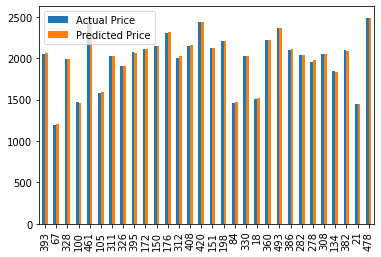

In [9]:
df2=df2.head(30)
df2.plot(kind='bar')

In [10]:
z=regressor.predict([[1518.0,1527.10,1520]]);z

array([1524.97369181])

In [11]:
acc=r2_score(y_test,predicted);acc

0.998581907044805